In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
train=numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\DeepPF\log_1\train.npy',allow_pickle=True).item()

In [34]:
valid_seg=[9, 24, 42, 256, 267, 268, 277]
selected={}
for seg in valid_seg:
    record=train[seg][0]
    # print(len(record))
    selected[seg]=[record[i*176:(i+1)*176] for i in range(28)]

In [35]:
len(selected[9])

28

In [38]:
mean_mat={}
for seg in valid_seg:
    # for day in selected[seg]:
    #     if len(day)!=176:
    #         print(seg,day)
    #         break
    tmp=numpy.array(selected[seg])
    # print(type(tmp))
    # print(tmp.shape)
    mean_mat[seg]=numpy.around(numpy.mean(tmp,axis=0),2)

In [39]:
len(mean_mat[9])

176

In [42]:
mean_mat_slot_20={}
for seg in mean_mat:
    new_record=[numpy.around(numpy.mean(mean_mat[seg][i*4:(i+1)*4]),2) for i in range(44)]
    mean_mat_slot_20[seg]=new_record

In [46]:
mean_mat_slot_20_norm=[]
for seg in mean_mat_slot_20:
    record=mean_mat_slot_20[seg]
    max_val=max(record)
    min_val=min(record)
    max_val_arr=numpy.array([max_val for i in range(44)])
    min_val_arr=numpy.array([min_val for i in range(44)])
    record=numpy.around((record-min_val_arr)/(max_val_arr-min_val_arr),2)
    mean_mat_slot_20_norm.append(record)

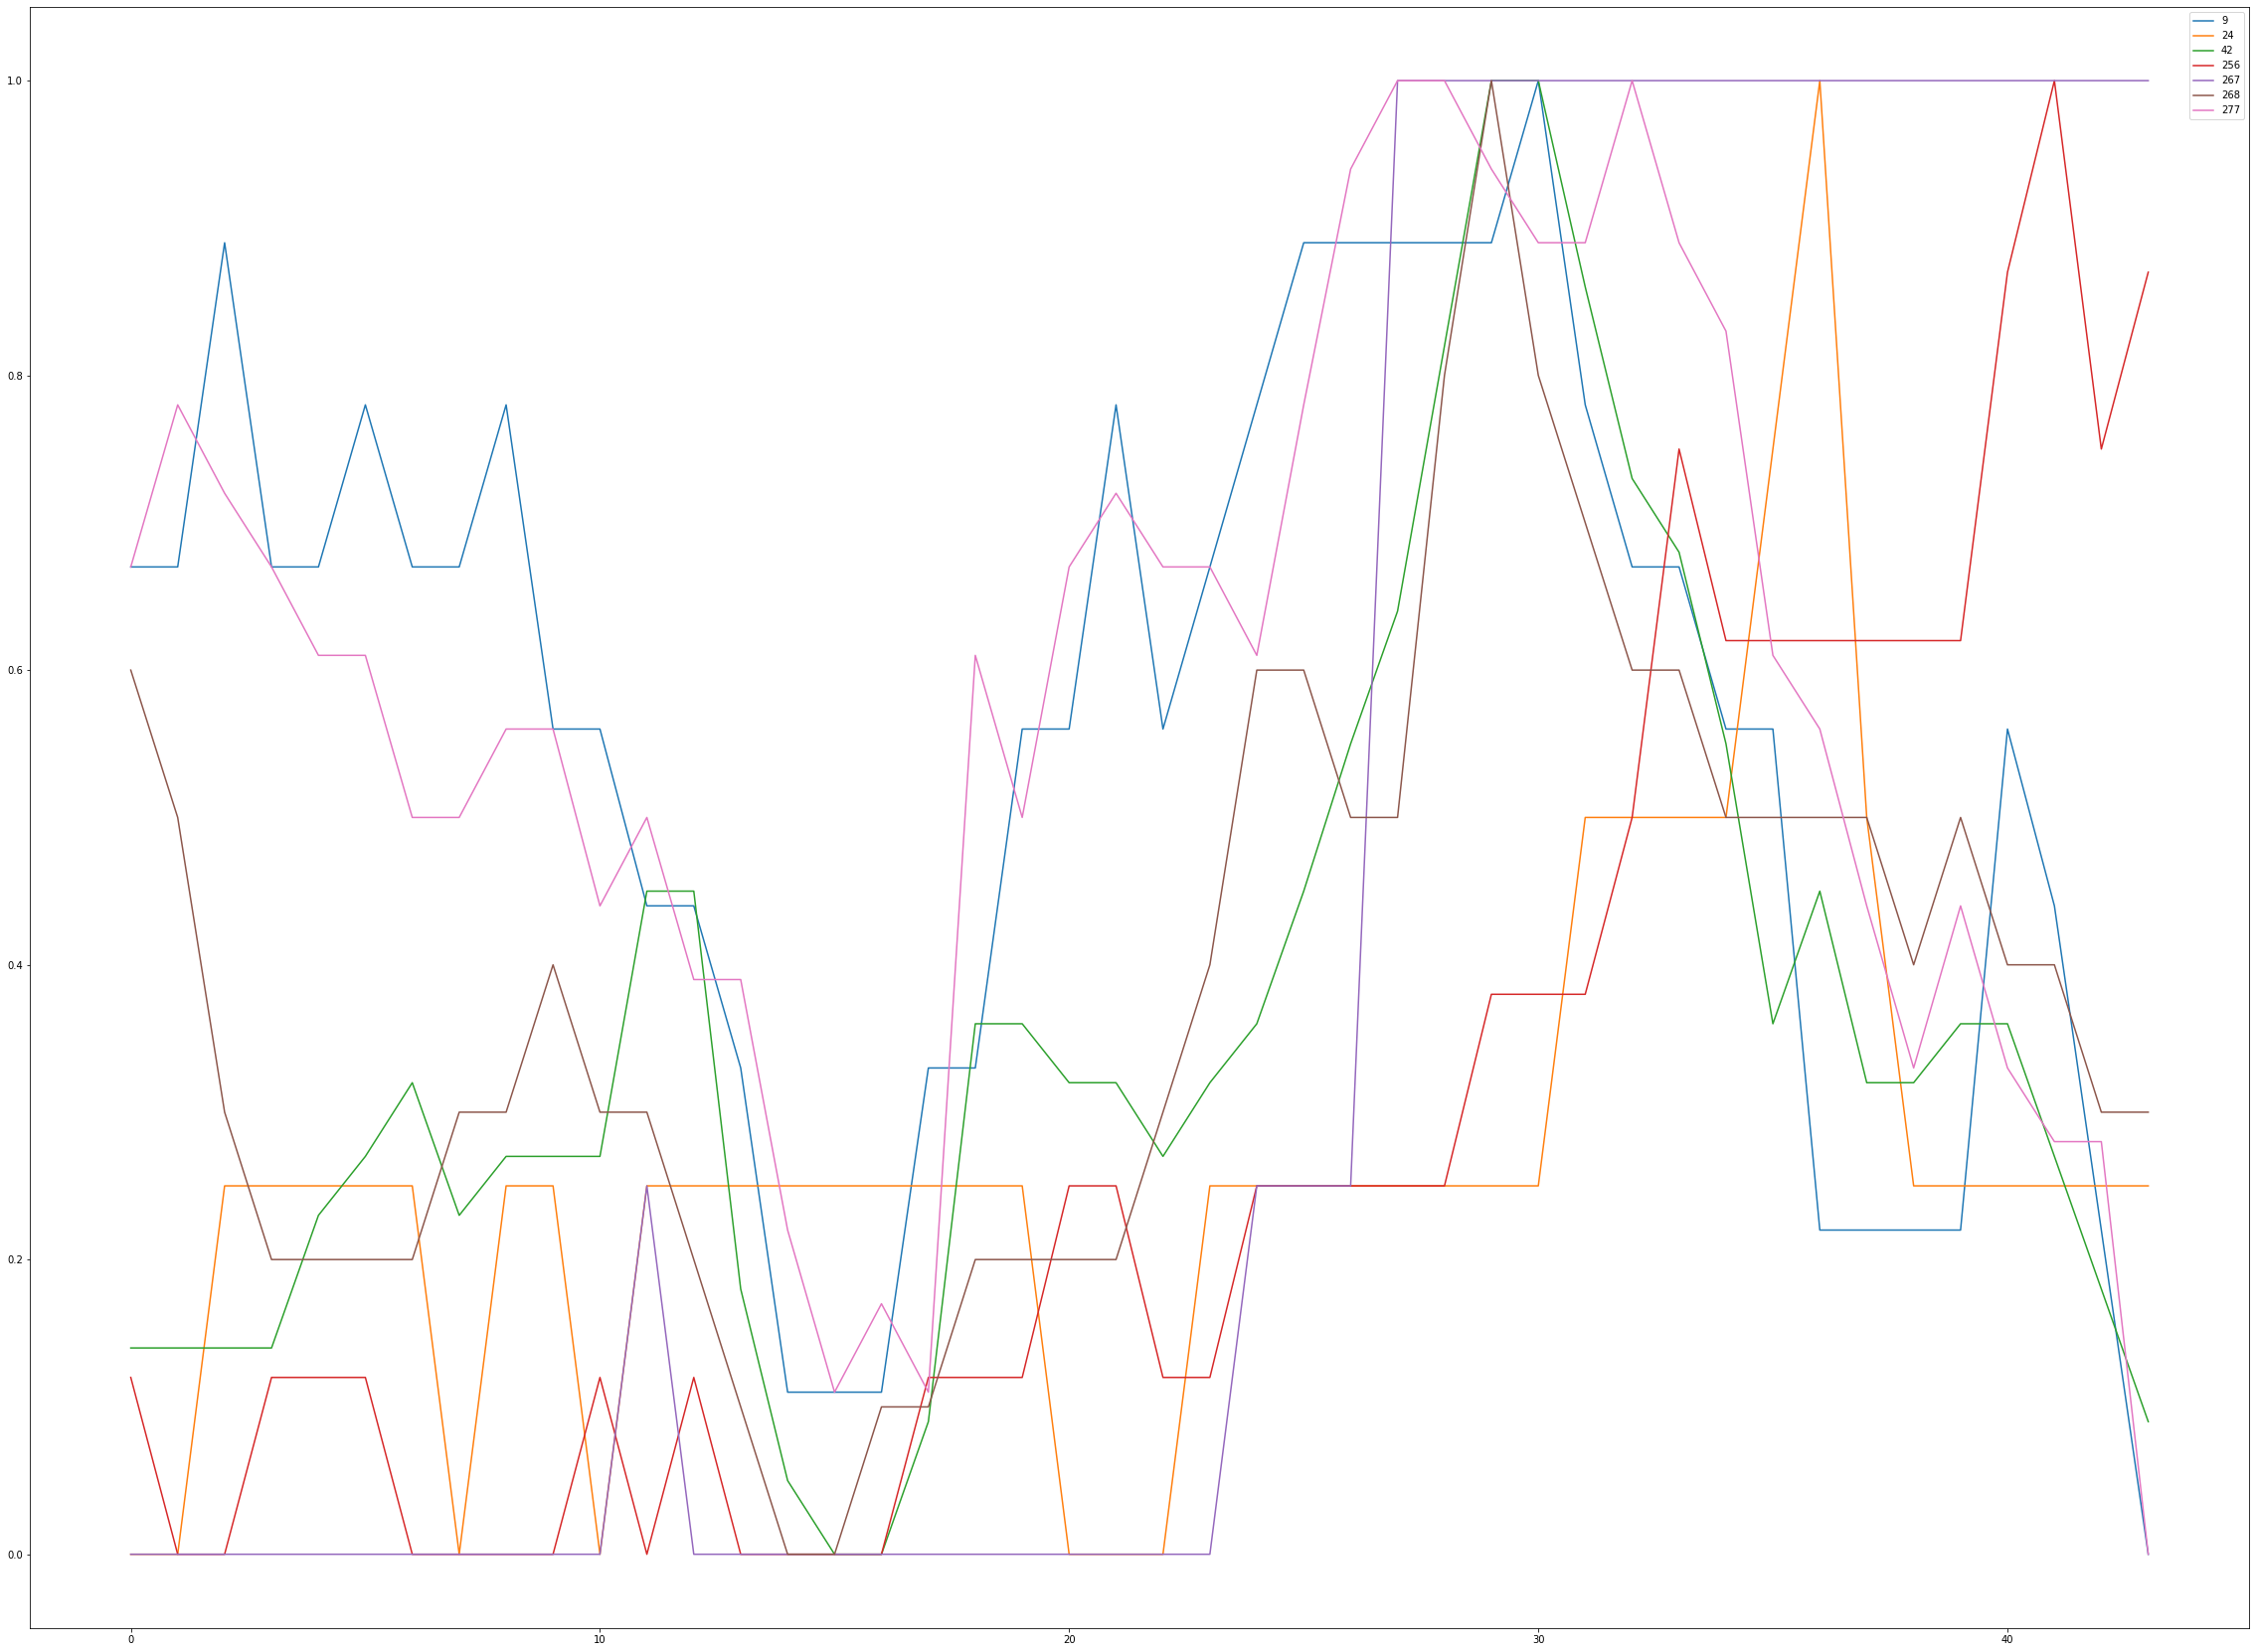

In [47]:
plt.rcParams['figure.figsize']=(40,30)
mean_mat_slot_20_keys=list(mean_mat_slot_20.keys())
for index,seg in enumerate(mean_mat_slot_20_keys):
    plt.plot([i for i in range(44)],mean_mat_slot_20_norm[index],label=str(seg))
plt.legend()
plt.show()

In [ ]:
new_mean_mat_normalized_dict={}
for index,seg in enumerate(valid_seg):
    new_mean_mat_normalized_dict[seg]=new_mean_mat_normalized[index]

In [ ]:
cluster(new_mean_mat_normalized_dict,0.75)

In [ ]:
for seg in new_mean_mat_normalized_dict:
    new=[numpy.around(each,2) for each in new_mean_mat_normalized_dict[seg]]
    new_mean_mat_normalized_dict[seg]=new

In [ ]:
numpy.save(r'C:\Users\e-wel\Documents\Python Scripts\DeepPF\log_1\聚类输入_归一化_20min.npy',mean_mat_slot_20_norm)

In [48]:
mean_mat_slot_20_norm

[array([0.67, 0.67, 0.89, 0.67, 0.67, 0.78, 0.67, 0.67, 0.78, 0.56, 0.56,
        0.44, 0.44, 0.33, 0.11, 0.11, 0.11, 0.33, 0.33, 0.56, 0.56, 0.78,
        0.56, 0.67, 0.78, 0.89, 0.89, 0.89, 0.89, 0.89, 1.  , 0.78, 0.67,
        0.67, 0.56, 0.56, 0.22, 0.22, 0.22, 0.22, 0.56, 0.44, 0.22, 0.  ]),
 array([0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.25, 0.25, 0.  ,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.  ,
        0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 , 0.5 ,
        0.5 , 0.5 , 0.75, 1.  , 0.5 , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]),
 array([0.14, 0.14, 0.14, 0.14, 0.23, 0.27, 0.32, 0.23, 0.27, 0.27, 0.27,
        0.45, 0.45, 0.18, 0.05, 0.  , 0.  , 0.09, 0.36, 0.36, 0.32, 0.32,
        0.27, 0.32, 0.36, 0.45, 0.55, 0.64, 0.82, 1.  , 1.  , 0.86, 0.73,
        0.68, 0.55, 0.36, 0.45, 0.32, 0.32, 0.36, 0.36, 0.27, 0.18, 0.09]),
 array([0.12, 0.  , 0.  , 0.12, 0.12, 0.12, 0.  , 0.  , 0.  , 0.  , 0.12,
        0.  , 0.12, 0.  , 0.  , 

In [ ]:
numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\DeepPF\log_0\聚类输入_归一化.npy',new_mean_mat_normalized_dict)

In [ ]:
valid_index=[]
#cluster 对应的index
for i in [24, 256, 267]:
    for index,seg in enumerate(valid_seg):
        if i ==seg:
            valid_index.append(index)
valid_index

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=None,linkage='complete',affinity='cosine', distance_threshold=0.9,compute_full_tree =True).fit(test)
 clustering.labels_

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(test)
kmeans.labels_
segs=[9, 24, 42, 256, 267, 268, 277]
clusters=[1, 0, 2, 1, 0, 0, 2, 1]
cluster_dict={}
for index,seg in enumerate(segs):
    if clusters[index] not in cluster_dict:
        cluster_dict[clusters[index]]=[]
    cluster_dict[clusters[index]].append(seg)
cluster_dict

In [3]:
target=[24, 256, 267]
target_list=[]
for i in target:
    for index,j in enumerate([9, 24, 42, 256, 267, 268, 277]):
        if i==j:
            target_list.append(index)
target_list

[1, 3, 4]